In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load dataset
data = pd.read_csv("Telco-Customer-Churn.csv")

# Print column names to debug
for col in data.columns:
    print('Column:', col, '\t', data[col].dtype)
    print(data[col].unique())
    print()    

Column: customerID 	 object
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Column: gender 	 object
['Female' 'Male']

Column: SeniorCitizen 	 int64
[0 1]

Column: Partner 	 object
['Yes' 'No']

Column: Dependents 	 object
['No' 'Yes']

Column: tenure 	 int64
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Column: PhoneService 	 object
['No' 'Yes']

Column: MultipleLines 	 object
['No phone service' 'No' 'Yes']

Column: InternetService 	 object
['DSL' 'Fiber optic' 'No']

Column: OnlineSecurity 	 object
['No' 'Yes' 'No internet service']

Column: OnlineBackup 	 object
['Yes' 'No' 'No internet service']

Column: DeviceProtection 	 object
['No' 'Yes' 'No internet service']

Column: TechSupport 	 object
['No' 'Yes' 'No internet service']

Column: StreamingTV 	 object
['No' 'Yes

In [3]:
categorical_columns = ['InternetService', 'OnlineSecurity', 'MultipleLines',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
two_value_columns = ['gender']

columns = list(set(categorical_columns).union(yes_no_columns, two_value_columns))

print(columns)

# SeniorCitizen is already 0/1.

['StreamingMovies', 'Partner', 'PhoneService', 'gender', 'OnlineSecurity', 'MultipleLines', 'PaperlessBilling', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'StreamingTV', 'Contract', 'PaymentMethod', 'Dependents', 'TechSupport']


In [4]:
# Display basic information about the dataset
data.info()

# Summary statistics for numerical columns
data.describe()

# Check for missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

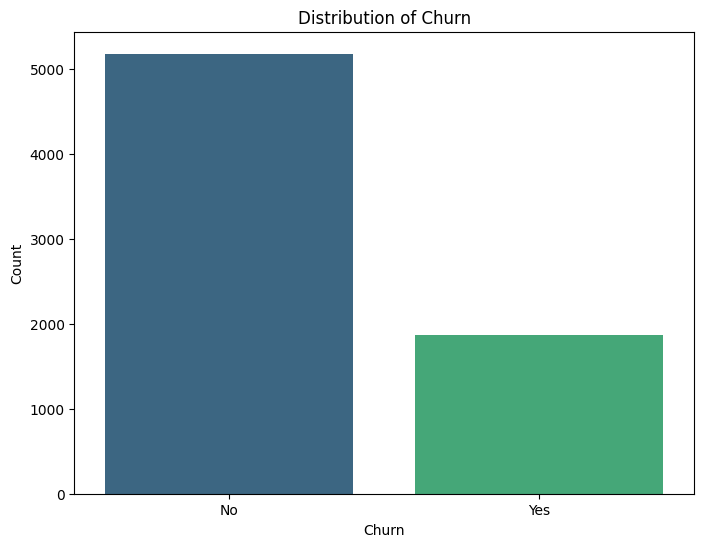

In [5]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Churn', hue='Churn', palette='viridis', legend=False)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

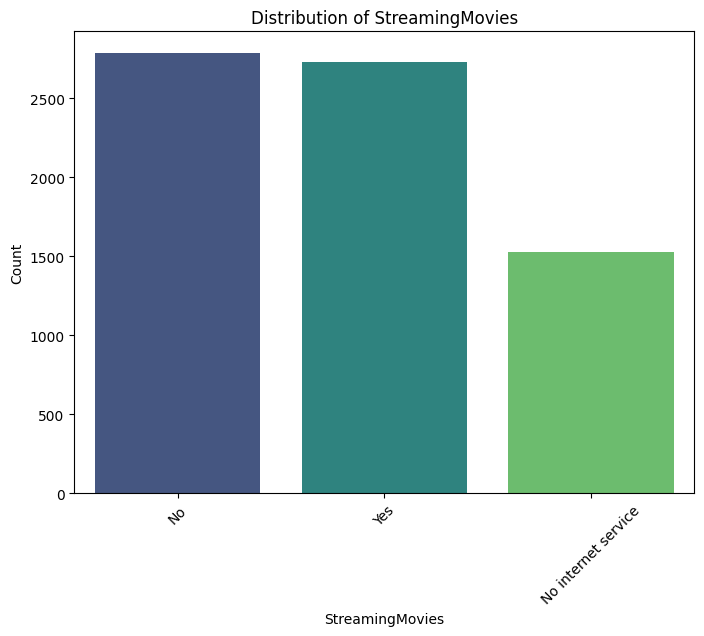

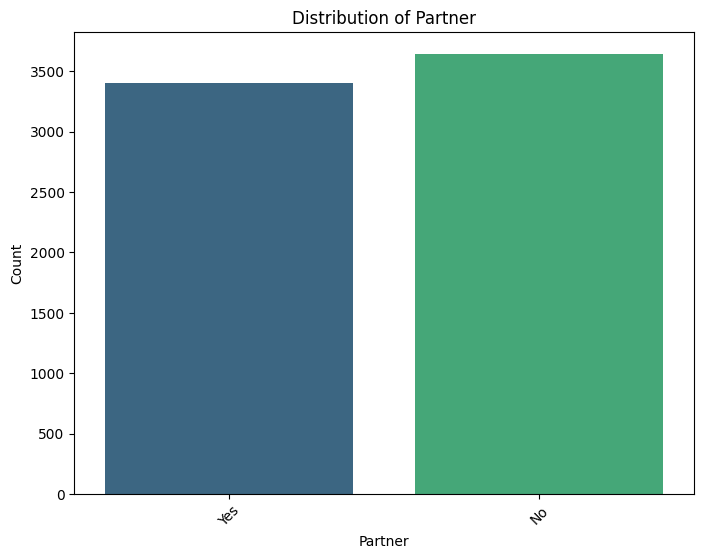

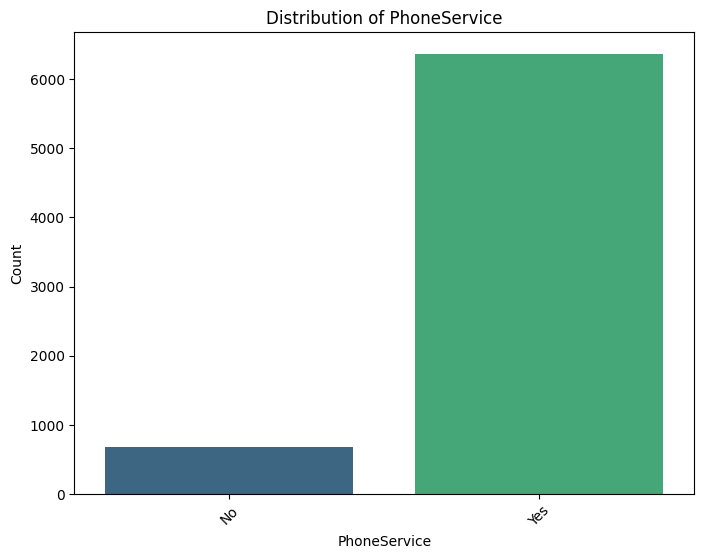

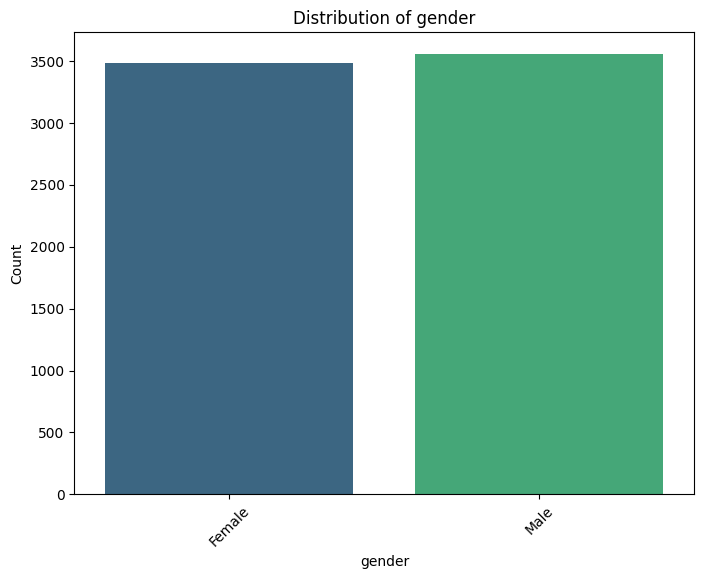

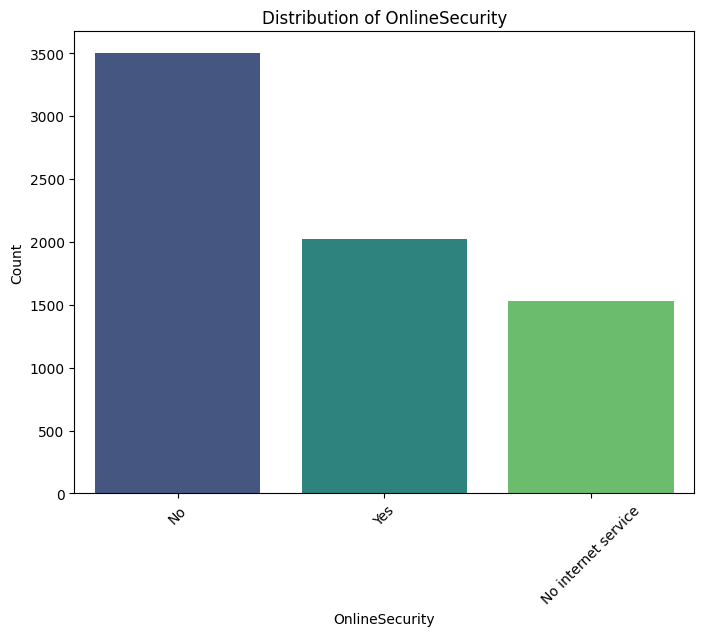

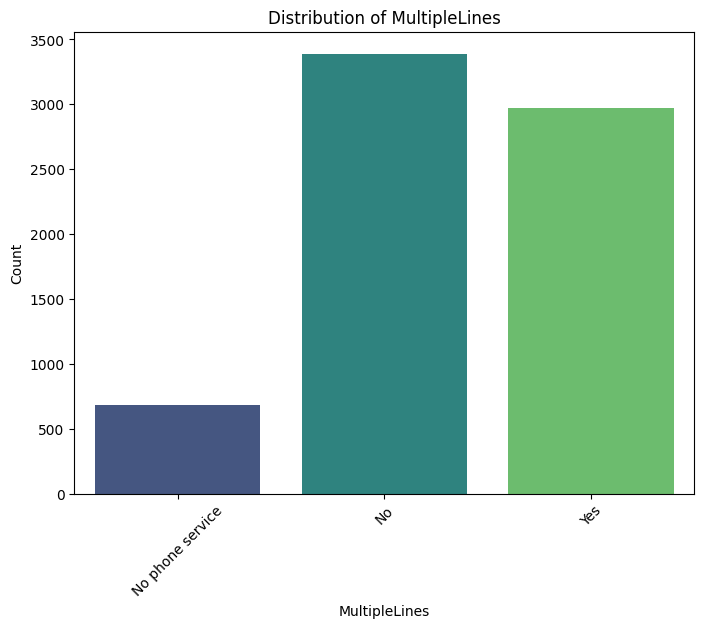

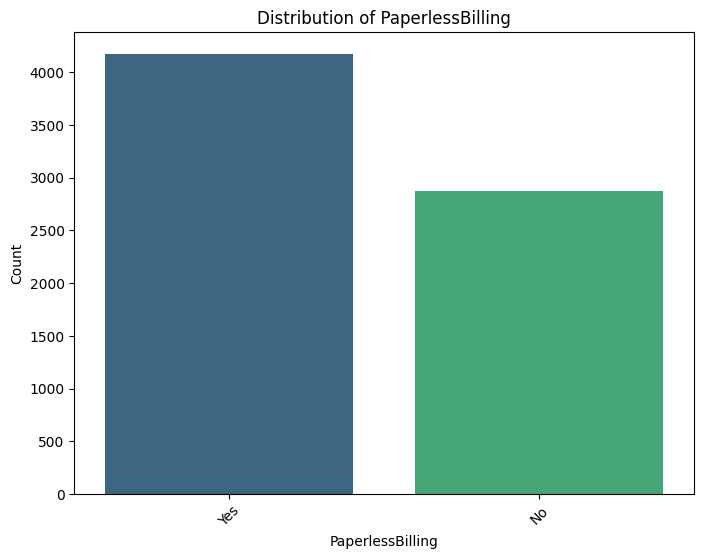

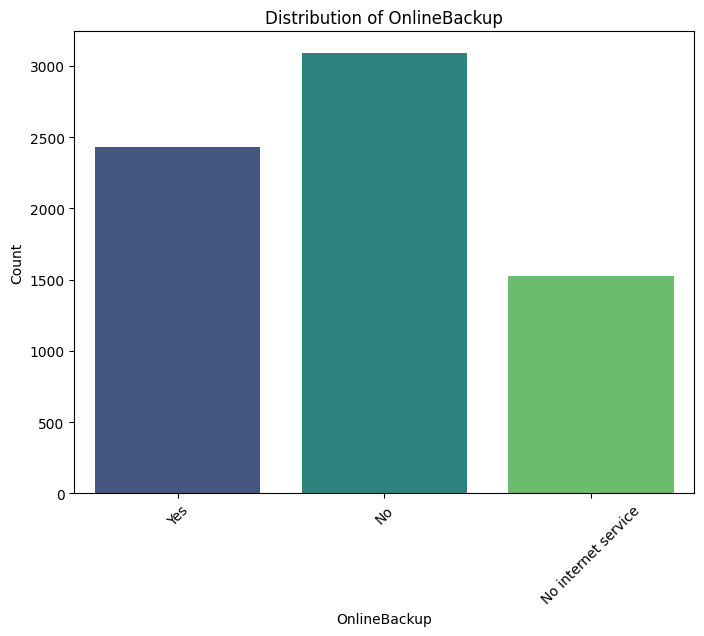

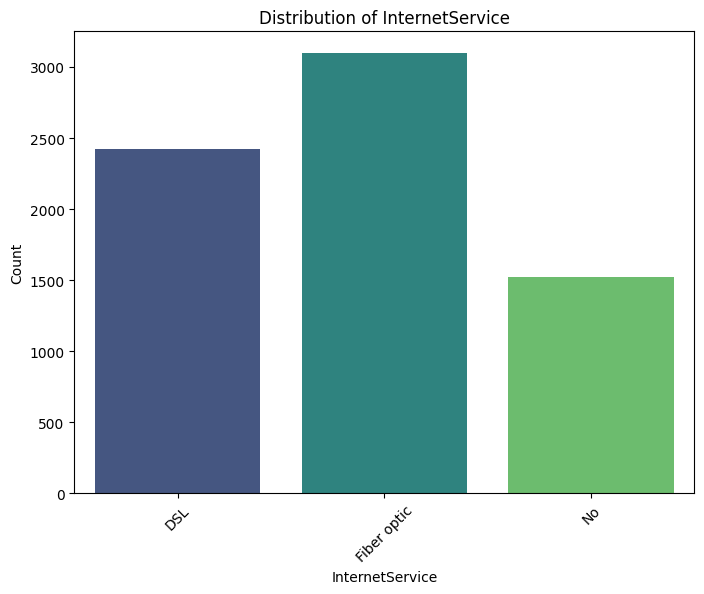

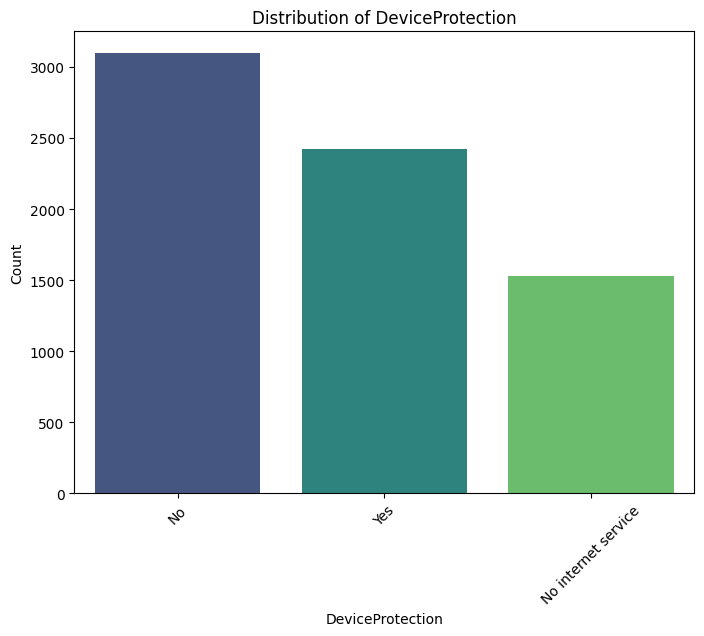

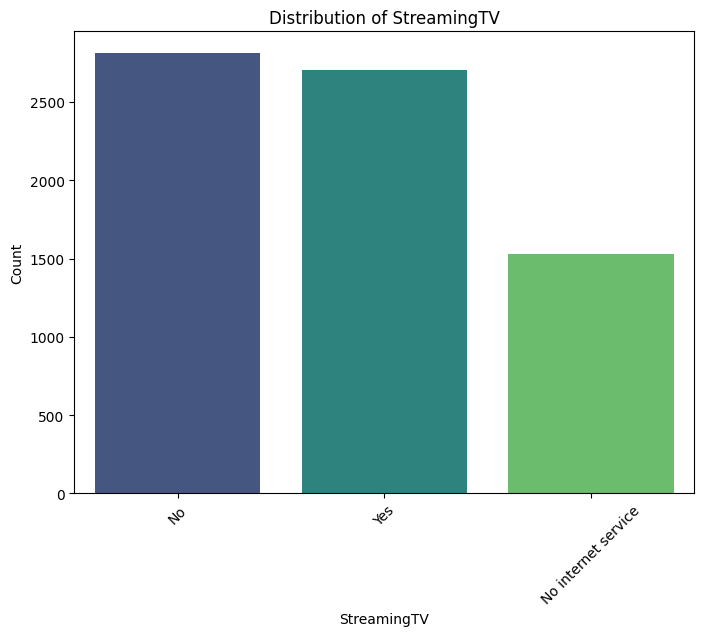

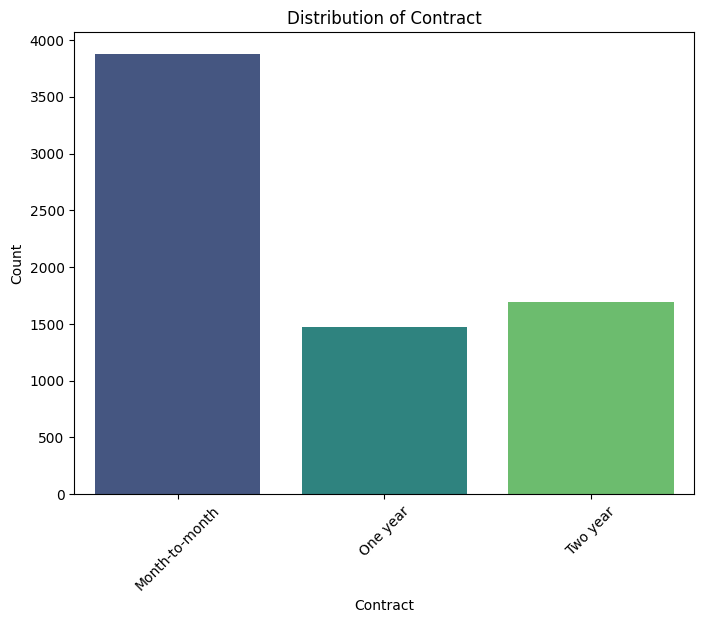

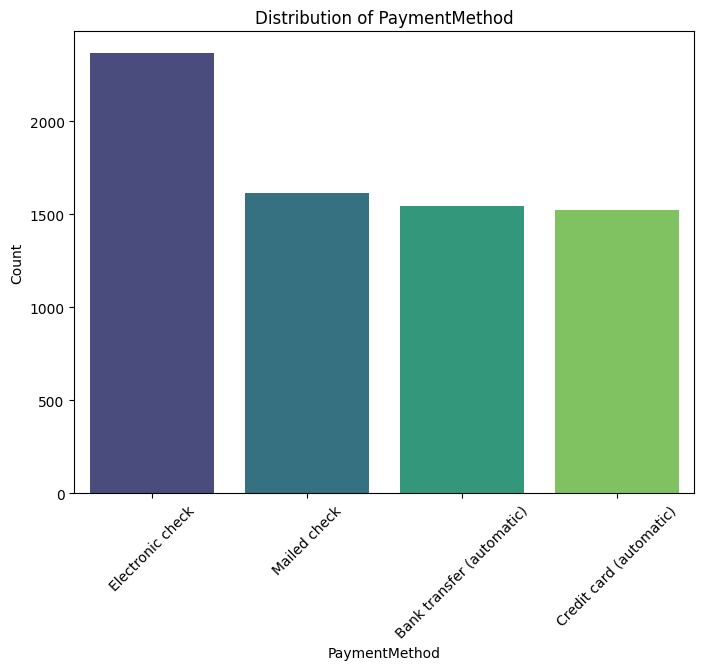

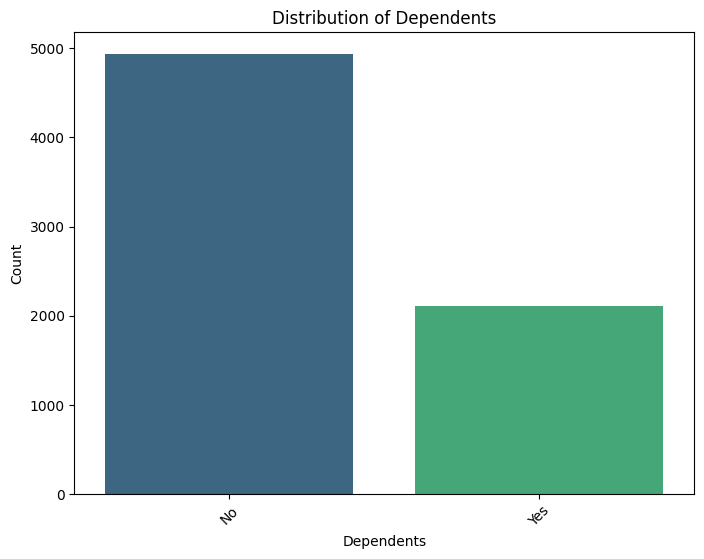

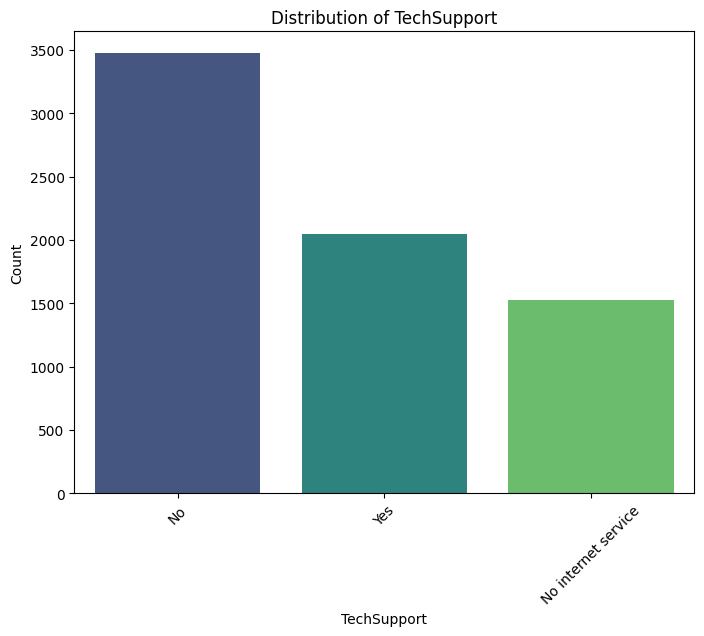

In [6]:
# Plot the distribution of categorical features
for column in columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=column, hue=column, palette='viridis', legend=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

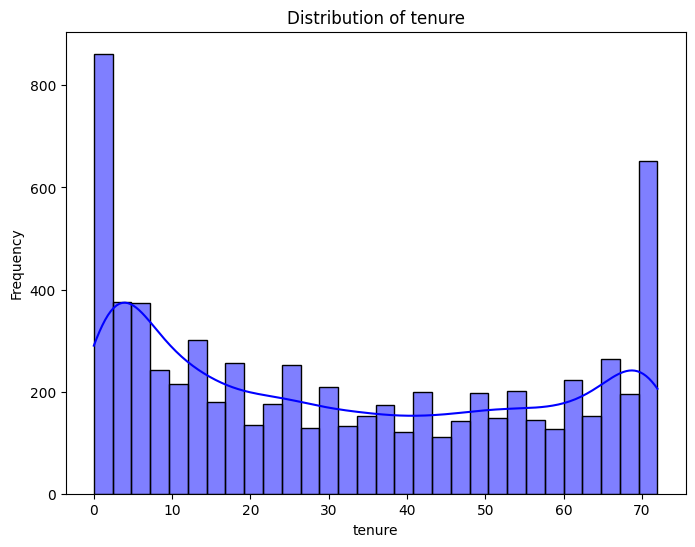

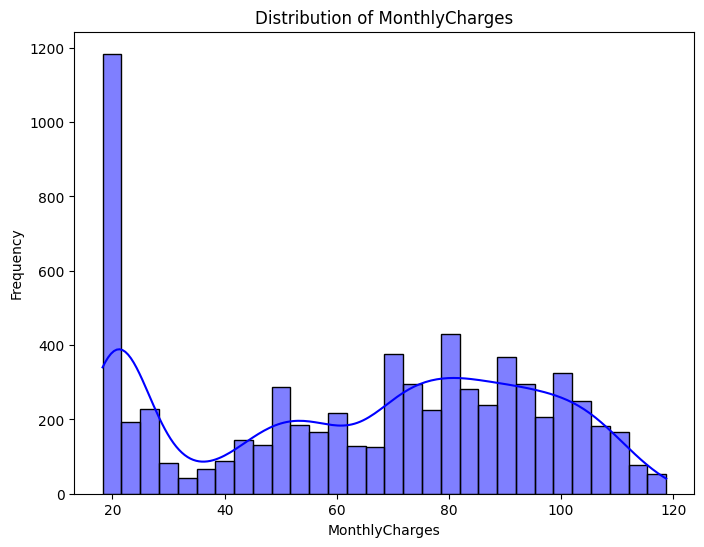

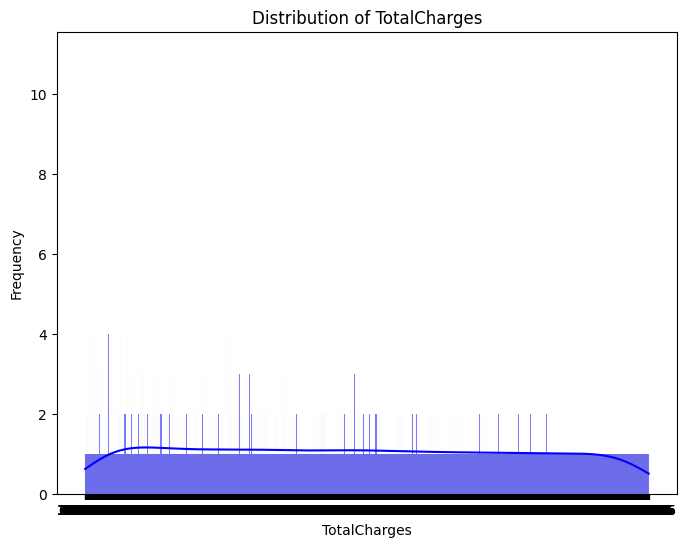

In [7]:
# List of numerical columns
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plot the distribution of numerical features
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=column, kde=True, bins=30, color='blue', legend=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


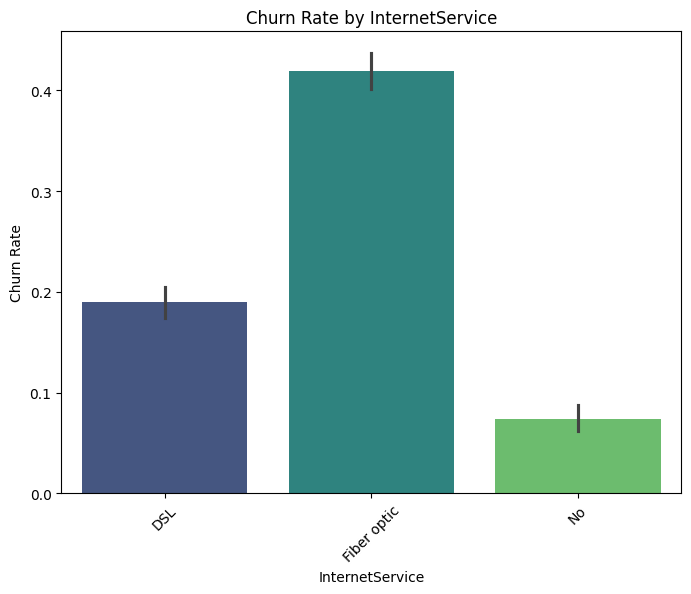

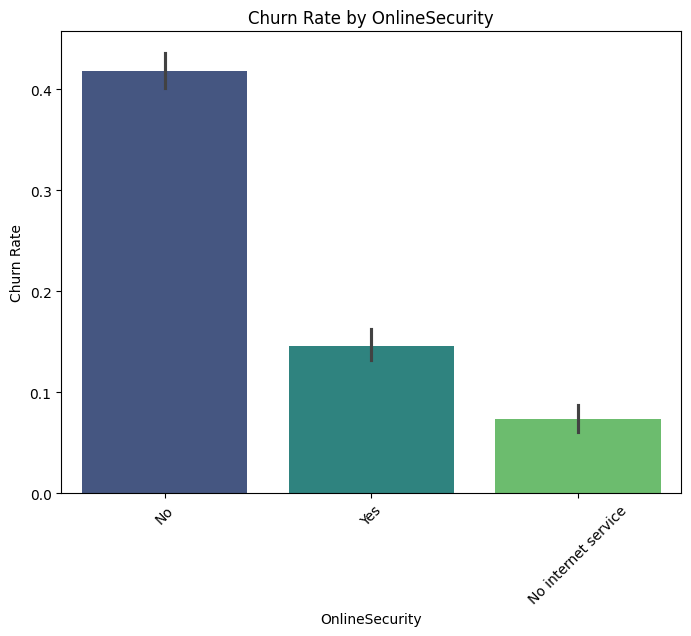

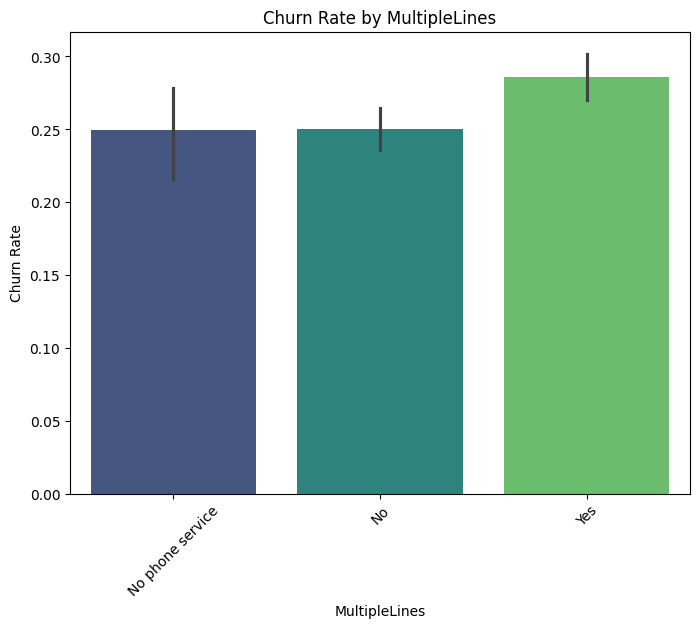

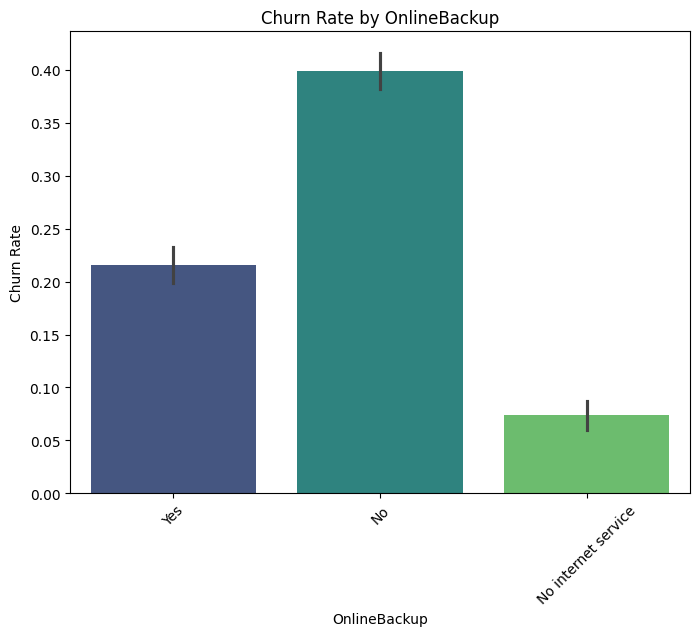

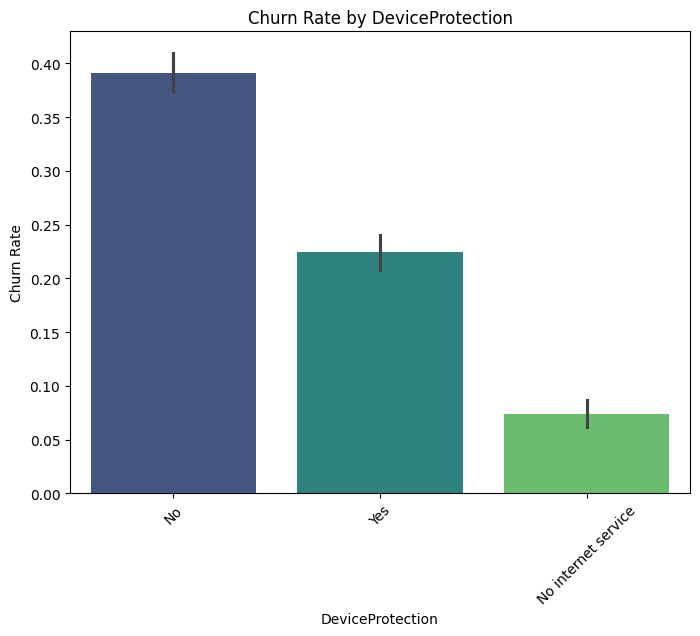

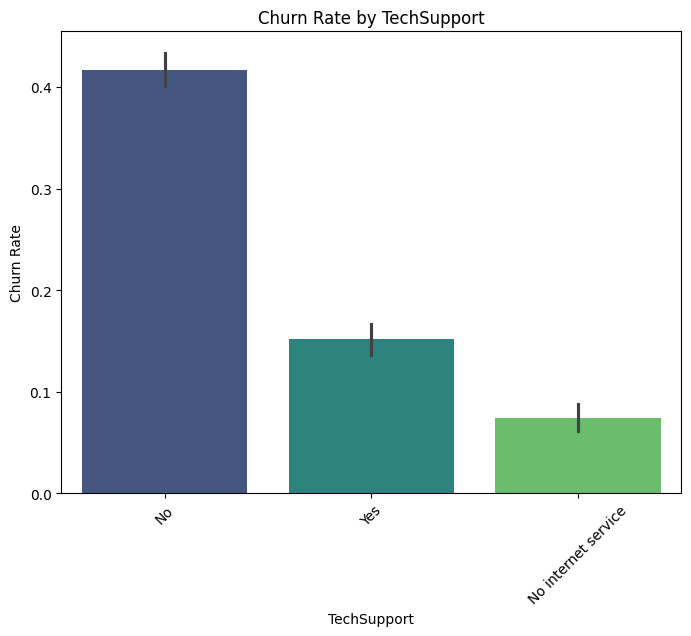

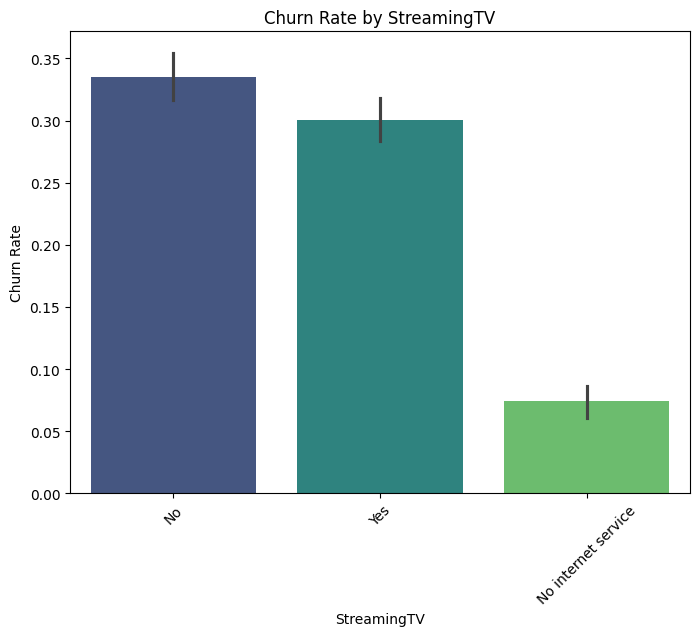

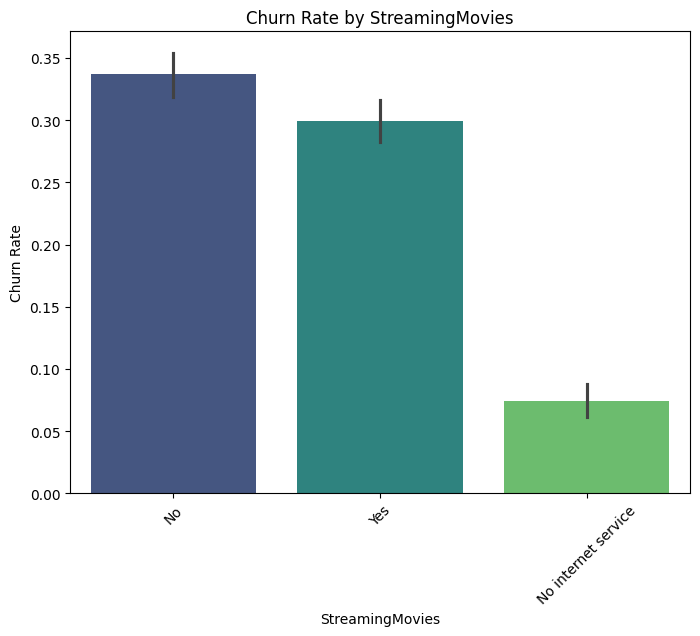

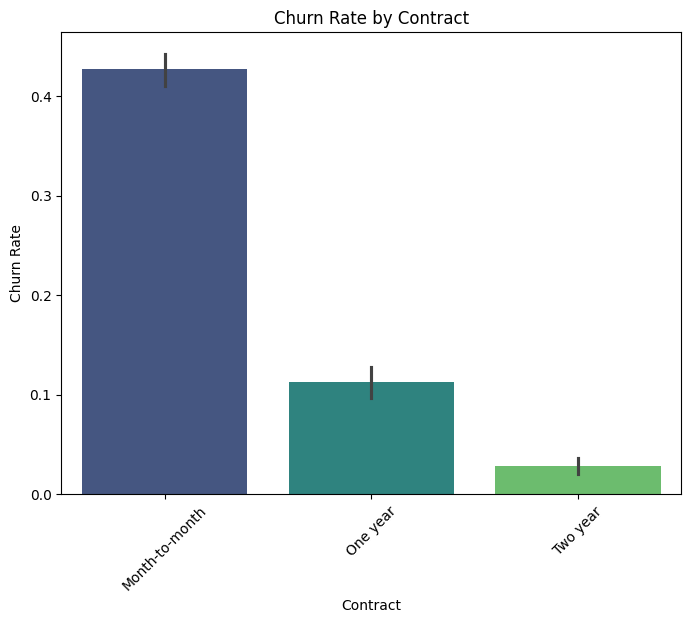

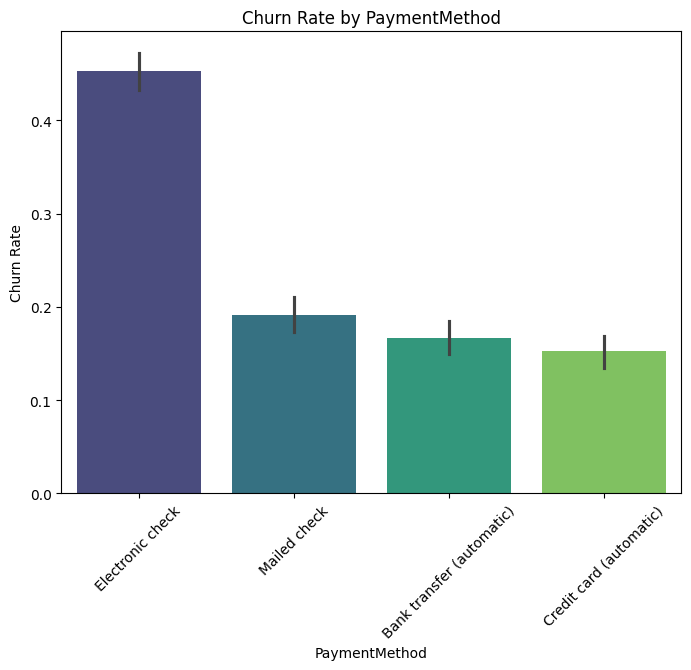

In [8]:
# Plot churn rates by categorical features
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.barplot(data=data, x=column, hue=column, y=data['Churn'].map({'Yes': 1, 'No': 0}), palette='viridis', legend=False)
    plt.title(f'Churn Rate by {column}')
    plt.xlabel(column)
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=45)
    plt.show()


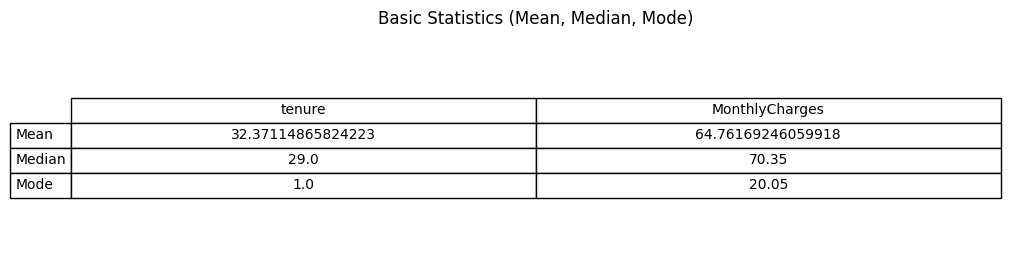

In [9]:
# Calculate basic statistics - added myself (code from chatGPT) - Luca
numericData = data.select_dtypes(include=['number']).drop(columns=['SeniorCitizen'])

statistics = numericData.agg(['mean', 'median', lambda x: x.mode()[0]])
statistics.index = ['Mean', 'Median', 'Mode']

# Plotting the table
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('off')  # Remove axes
table = ax.table(cellText=statistics.values,
                 colLabels=statistics.columns,
                 rowLabels=statistics.index,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)  # Adjust size
plt.title("Basic Statistics (Mean, Median, Mode)")
plt.show()

Note that the above table contains SeniorCitizen and Churn which can be interpreted as Yes/No variable. In this case, they are 0(No) and 1(Yes).

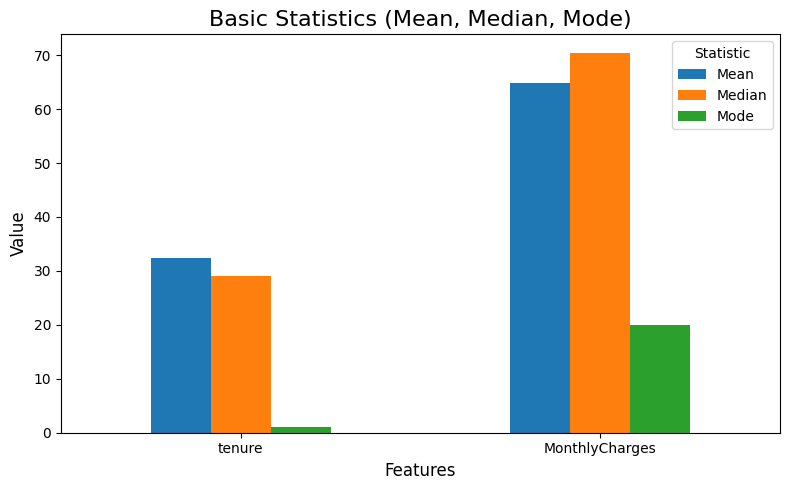

In [10]:
# Calculate basic statistics - added myself (code from chatGPT) - Luca

# Transpose statistics for plotting
statistics_transposed = statistics.T
statistics_transposed.plot(kind='bar', figsize=(8, 5))

# Customizing the plot
plt.title('Basic Statistics (Mean, Median, Mode)', fontsize=16)
plt.ylabel('Value', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Statistic')
plt.tight_layout()
plt.show()

In [11]:
print(statistics)

           tenure  MonthlyCharges
Mean    32.371149       64.761692
Median  29.000000       70.350000
Mode     1.000000       20.050000


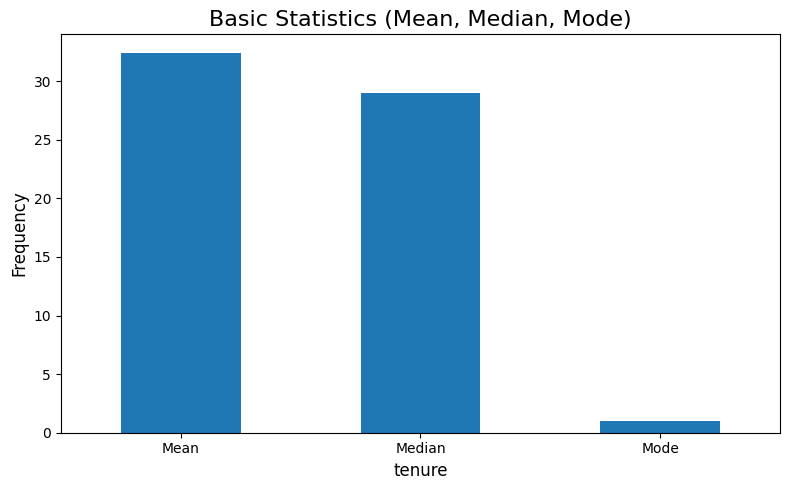

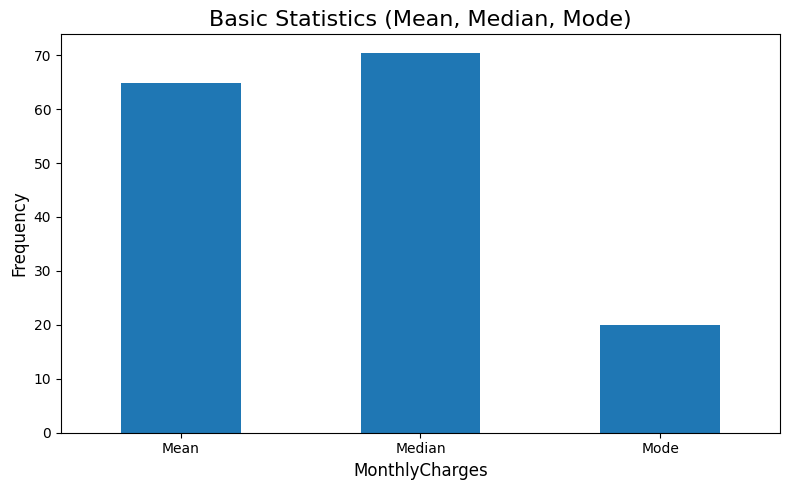

In [12]:
# Separate statistics to better show each column
for columnName in statistics.columns:
    statistics[columnName].plot(kind='bar', figsize=(8, 5), legend=False)
    
    # Customizing the plot
    plt.title('Basic Statistics (Mean, Median, Mode)', fontsize=16)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(columnName, fontsize=12)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [13]:
# Convert Churn column from Yes/No to Binary 0/1
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

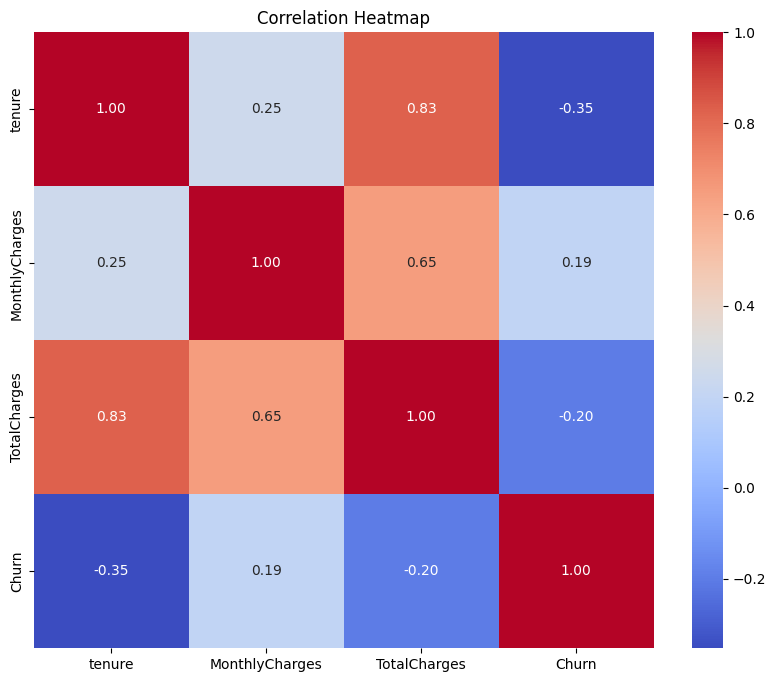

In [14]:
# Convert Churn to numerical for correlation
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Calculate correlation matrix
correlation_matrix = data[numerical_columns + ['Churn']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [15]:
# Replace 'Churn' with the actual column name if it's different
churn_column = data['Churn']

# Calculate required statistics
total_count = len(churn_column)
count_1 = (churn_column == 1).sum()
count_0 = (churn_column == 0).sum()
percentage_1 = (count_1 / total_count) * 100
percentage_0 = (count_0 / total_count) * 100

# Print results
print(f"Total count: {total_count}")
print(f"Count of 1: {count_1}")
print(f"Count of 0: {count_0}")
print(f"Percentage of 1: {percentage_1:.2f}%")
print(f"Percentage of 0: {percentage_0:.2f}%")

Total count: 7043
Count of 1: 1869
Count of 0: 5174
Percentage of 1: 26.54%
Percentage of 0: 73.46%


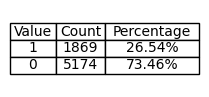

Total count: 7043


In [16]:
# Churn columns statistics shown in a table
table_data = [
    [1, count_1, f"{percentage_1:.2f}%"],
    [0, count_0, f"{percentage_0:.2f}%"]
]

# Define column and row labels
columns = ["Value", "Count", "Percentage"]

# Create a figure and axis for the table
fig, ax = plt.subplots(figsize=(2, 1))
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(cellText=table_data, colLabels=columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(columns))))

# Show the table
plt.show()

print(f"Total count: {total_count}") # remaining variable

# One-Hot-Encoding

In [17]:
print(data.columns)
print(data.head())

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...       

In [18]:
# Check the columns list
print("Columns list:")
print(columns)

# Compare with DataFrame columns
print("DataFrame columns:")
print(data.columns)

# Check if all `columns` are in `data`
missing_columns = [col for col in columns if col not in data.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All columns are present in the DataFrame.")


Columns list:
['Value', 'Count', 'Percentage']
DataFrame columns:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Missing columns: ['Value', 'Count', 'Percentage']


In [19]:
# Step 4: Remove the customerID column - we do not need this.
if 'customerID' in data.columns:
    data = data.drop(columns=['customerID'])

# Perform one-hot encoding

# Step 1: Convert 'gender' column to 0/1
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})
print("(Gender) Data Frame columns:", data.columns)

# Step 2: Convert Yes/No columns to 0/1
for col in yes_no_columns:
    data[col] = data[col].map({'Yes': 1, 'No': 0})
print("Yes/No Data Frame columns:", data.columns)

# Step 3: One-hot encode categorical columns

# Function to generate one-hot mapping dynamically
def generate_one_hot_mapping(unique_values):
    mapping = {value: [1 if i == j else 0 for i in range(len(unique_values))]
               for j, value in enumerate(unique_values)}
    return mapping

for col in categorical_columns:
    # Generate the mapping dynamically
    unique_values = data[col].unique()  # Get unique values from the column
    one_hot_mapping = generate_one_hot_mapping(unique_values)
    # Replace string values with one-hot-encoded lists
    data[col] = data[col].map(one_hot_mapping)

# Step 4: Ensure all columns are numeric
# Convert all Boolean columns (True/False) to numeric (0/1)
data = data.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# Note that Churn was converted to numeric in previous cells.

# Check the results
print(data.head())

(Gender) Data Frame columns: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Yes/No Data Frame columns: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1 

C:\Users\gattl067\AppData\Local\Temp\ipykernel_11976\3508472731.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: 1 if x is True else (0 if x is False else x))


In [20]:
print(data.dtypes)

# Select non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
print("\nNon-numeric columns:")
print(non_numeric_columns, "\n")
print(data[non_numeric_columns])

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

Non-numeric columns:
Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaymentMethod'],
      dtype='object') 

     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0        [1, 0, 0]       [1, 0, 0]      [1, 0, 0]    [1, 0, 0]   
1        [0, 1, 0]       [1, 0, 0]      [0, 1, 0]    [0, 1

This shows that non-numerical columns are the one-hot encoded categorical variables which turned into lists of numbers due to one-hot encoding. This is good for neural network.

In [21]:
print(data.head(10))

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   
5       1              0        0           0       8             1   
6       0              0        0           1      22             1   
7       1              0        0           0      10             0   
8       1              0        1           0      28             1   
9       0              0        0           1      62             1   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0     [1, 0, 0]       [1, 0, 0]      [1, 0, 0]    [1, 0, 0]        [1, 0, 0]   
1     [0, 1, 0]       [1, 0, 0]      [0, 1, 0]    [0, 1, 0

In [22]:
df_X = data.drop(columns=['Churn'])
df_y = data['Churn']

# Convert dataframces to Numpy arrrays
X = df_X.to_numpy()
y = df_y.to_numpy()

In [23]:
print(data.head())
print()
print(df_X.head())
print()
print(df_y.head())
print()
print(X)
print()
print(y)


   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0     [1, 0, 0]       [1, 0, 0]      [1, 0, 0]    [1, 0, 0]        [1, 0, 0]   
1     [0, 1, 0]       [1, 0, 0]      [0, 1, 0]    [0, 1, 0]        [0, 1, 0]   
2     [0, 1, 0]       [1, 0, 0]      [0, 1, 0]    [1, 0, 0]        [1, 0, 0]   
3     [1, 0, 0]       [1, 0, 0]      [0, 1, 0]    [0, 1, 0]        [0, 1, 0]   
4     [0, 1, 0]       [0, 1, 0]      [1, 0, 0]    [0, 1, 0]        [1, 0, 0]   

  TechSupport StreamingTV StreamingMovies   Contract  PaperlessBilling  \
0   [1, 0, 0]   [1

At this point the data frame should contain only numeric columns or columns that are categorical feature represented as binary vector atored in a Python list.

The next step is that you create Numpy arrays from this data. 

You then create the training examples. Typically the input features are stored in an array X and the target label, Churn, is stored in an array y.

You can use Scikit-learn to split the data randomly into training and testing.

In [24]:
# Flatten each row of X (input) by expanding one-hot encoded lists into separate columns
flattened_rows = np.array([np.concatenate([np.array(x) if isinstance(x, list) else [x] for x in row]) for row in X])
print("X\n", X)
print(X.dtype)
print("\nflattened_rows\n", flattened_rows)
print(flattened_rows.dtype)

X
 [[1 0 1 ... list([1, 0, 0, 0]) 29.85 29.85]
 [0 0 0 ... list([0, 1, 0, 0]) 56.95 1889.5]
 [0 0 0 ... list([0, 1, 0, 0]) 53.85 108.15]
 ...
 [1 0 1 ... list([1, 0, 0, 0]) 29.6 346.45]
 [0 1 1 ... list([0, 1, 0, 0]) 74.4 306.6]
 [0 0 0 ... list([0, 0, 1, 0]) 105.65 6844.5]]
object

flattened_rows
 [[1.0000e+00 0.0000e+00 1.0000e+00 ... 0.0000e+00 2.9850e+01 2.9850e+01]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 5.6950e+01 1.8895e+03]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 5.3850e+01 1.0815e+02]
 ...
 [1.0000e+00 0.0000e+00 1.0000e+00 ... 0.0000e+00 2.9600e+01 3.4645e+02]
 [0.0000e+00 1.0000e+00 1.0000e+00 ... 0.0000e+00 7.4400e+01 3.0660e+02]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 1.0565e+02 6.8445e+03]]
float64


In [25]:
X = flattened_rows # update X

In [26]:
# Split the dataset into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split

# Assuming X is the input data and y is the output labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
print(X_train, X_test, y_train, y_test)

[[1.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 6.48500e+01
  1.33680e+03]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 9.72000e+01
  5.12945e+03]
 [0.00000e+00 0.00000e+00 1.00000e+00 ... 0.00000e+00 2.34500e+01
  2.34500e+01]
 ...
 [0.00000e+00 0.00000e+00 1.00000e+00 ... 0.00000e+00 2.11500e+01
  3.06050e+02]
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 0.00000e+00 9.94500e+01
  1.20015e+03]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 1.00000e+00 1.98000e+01
  4.57300e+02]] [[1.0000e+00 0.0000e+00 1.0000e+00 ... 0.0000e+00 2.4800e+01 2.4800e+01]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 2.5250e+01 9.9645e+02]
 [1.0000e+00 0.0000e+00 1.0000e+00 ... 0.0000e+00 1.9350e+01 1.0317e+03]
 ...
 [0.0000e+00 0.0000e+00 1.0000e+00 ... 0.0000e+00 1.9900e+01 3.2975e+02]
 [1.0000e+00 0.0000e+00 1.0000e+00 ... 1.0000e+00 4.3950e+01 2.9601e+03]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 3.1350e+01 3.1350e+01]] [0 0 1 ... 0 1 0] [1 0 0 ... 0 0 1]


# Stage 2 – Creation of the MLP using Keras

Problem with installing tensorflow. Error suggested long path problem, but [tensorflow](https://www.tensorflow.org/install) does not support Python 3.12. Installed in a new location and added to PYTHONPATH

In [35]:
print(X_train)
print(X_train.shape[1],) # this is the number of inputs of one fact which sets the number of input neurons

[[1.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 6.48500e+01
  1.33680e+03]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 9.72000e+01
  5.12945e+03]
 [0.00000e+00 0.00000e+00 1.00000e+00 ... 0.00000e+00 2.34500e+01
  2.34500e+01]
 ...
 [0.00000e+00 0.00000e+00 1.00000e+00 ... 0.00000e+00 2.11500e+01
  3.06050e+02]
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 0.00000e+00 9.94500e+01
  1.20015e+03]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 1.00000e+00 1.98000e+01
  4.57300e+02]]
40


In [42]:
from tensorflow.random import set_seed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

set_seed(42) # random seed for reproducibility

# Build a simple MLP model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define the input shape
    Dense(8, activation='relu'), # 64
    Dense(4, activation='relu'), # 32
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=2) # epochs=1000

# Test the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
# Print the test results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/10
2817/2817 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7056 - loss: 5.7311
Epoch 2/10
2817/2817 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7393 - loss: 0.5766
Epoch 3/10
2817/2817 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7393 - loss: 0.5741
Epoch 4/10
2817/2817 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7393 - loss: 0.5739
Epoch 5/10
2817/2817 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7393 - loss: 0.5739
Epoch 6/10
2817/2817 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7393 - loss: 0.5739
Epoch 7/10
2817/2817 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7393 - loss: 0.5739
Epoch 8/10
2817/2817 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7393 - loss: 0.5739
Epoch 9/10
2817/2817 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7393 - loss: 0.5739
Epoch 10/10
2817/2817 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7393 - loss: 0.5739
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7253 - loss: 0.5881
Test Loss: 0.5780
Test Accuracy: 0.7353


Multiple times the model entered the same pair of accuracy and loss numbers in multiple epochs, while training.